# Prediksi Harga Rumah Tebet
![Tebet](https://3.bp.blogspot.com/-O7zlNIkAt6Y/TzeCN7PF3HI/AAAAAAAAAHY/Sjobj-cBF-4/s1600/rumah+tebet+utara+2.jpg)

## Latar Belakang
Harga rumah sangat dipengaruhi oleh berbagai fitur seperti luas tanah, luas bangunan, jumlah kamar, jumlah lantai, dan lokasi. Tanpa sistem prediksi yang tepat, konsumen akan kesulitan memprediksi harga rumah inpian mereka.

## Masalah
- Fitur apa saja yang paling memengaruhi harga rumah di wilayah Tebet?
- Berapa estimasi harga rumah berdasarkan fitur-fitur tertentu?

## Tujuan
- Mengidentifikasi fitur yang paling berpengaruh terhadap harga rumah di Tebet.
- Membangun model prediksi harga rumah menggunakan teknik machine learning regresi.

# Tahapan Proses

- Mengimpor Pustaka dan Modul
- Membaca Data
- Analisis Data (EDA)
- Pembersihan dan Pengolahan Data
- Pembuatan Model
- Evaluasi Model
- Prediksi Harga

# Mengimpor Pustaka dan Modul

Mengimpor pustaka dan modul yang dibutuhkan untuk visualisasi, pembersihan data, pembuatan model, hingga evaluasi model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

# Membaca Data

Mengambil dataset dari [kaggle](https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah) melalui bentuk zip.

In [2]:
!curl -L -o daftar-harga-rumah.zip\
  "https://www.kaggle.com/api/v1/datasets/download/wisnuanggara/daftar-harga-rumah"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  109k  100  109k    0     0   143k      0 --:--:-- --:--:-- --:--:--  347k


Mengekstrak file zip yang telah diunduh. Terdapat 2 file yang terekstrak DATA RUMAH.xlsx dan HARGA RUMAH JAKSEL.xlsx. HARGA RUMAH JAKSEL.xlsx merupakan dataset yang saya pakai pada notebook ini.

In [3]:
!unzip "/content/daftar-harga-rumah.zip"

Archive:  /content/daftar-harga-rumah.zip
  inflating: DATA RUMAH.xlsx         
  inflating: HARGA RUMAH JAKSEL.xlsx  


Mengubah nama dataset HARGA RUMAH JAKSEL.xlsx menjadi data_rumah_tebet.xlsx untuk mempermudah proses pemrosesan data.

In [4]:
os.rename("/content/DATA RUMAH.xlsx", "/content/data_rumah_tebet.xlsx")

Mengubah dataset excel menjadi dataframe menggunakan pustaka pandas, kemudian menampilkan dataframe yang dibuat.

In [5]:
df = pd.read_excel("/content/data_rumah_tebet.xlsx")
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Memperoleh informasi singkat tentang dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


Dataset ini berisi **1.010 entri** tanpa null value. Dataset berisi data rumah yang berada di kawasan **Tebet, Jakarta Selatan**.  

- NO (int64) — Nomor urut atau ID rumah
- NAMA RUMAH (object) — Nama atau deskripsi rumah
- HARGA (int64) — Harga rumah (dalam satuan rupiah)
- LB (int64) — Luas Bangunan dalam meter persegi (m²)
- LT (int64) — Luas Tanah dalam meter persegi (m²)
- KT (int64) — Jumlah Kamar Tidur
- KM (int64) — Jumlah Kamar Mandi
- GRS (int64) — Jumlah Garasi


# Analisis Data (EDA)

Melihat karakteristik atau informasi dari setiap kolom dalan dataframe, melihat nilai maksimum (max), nilai minimum (min), standar deviasi (std), quartil atas (75%), dan quartil bawah (25%). nilai-nilai ini penting untuk dianalisis selanjutnya.

In [7]:
df.describe()

,NO,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


## Melihat Duplikasi

Melihat duplikasi pada dataframe, dapat dilihat bahwa tidak ada duplikasi entry pada dataset.

In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1005,False
1006,False
1007,False
1008,False


## Mengidentifikasi Outlier

Mengambil kolom dengan nilai bertipe obj (string), kemudian membuangnya karena kolom seperti NAMA RUMAH tidak diperlukan dalam analisis selanjutnya. Definisikan satu dataframe baru bernama df_numeric yang menampung kolom numeric (angka). Kolom NO juga dihapus karena hanya berisi urutan entry data yang tidak diperlukan.

In [9]:
obj_cols = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(obj_cols, axis=1)
df_numeric = df_numeric.drop("NO", axis=1)

Melihat adanya outlier dari semua kolom menggunakan boxplot.

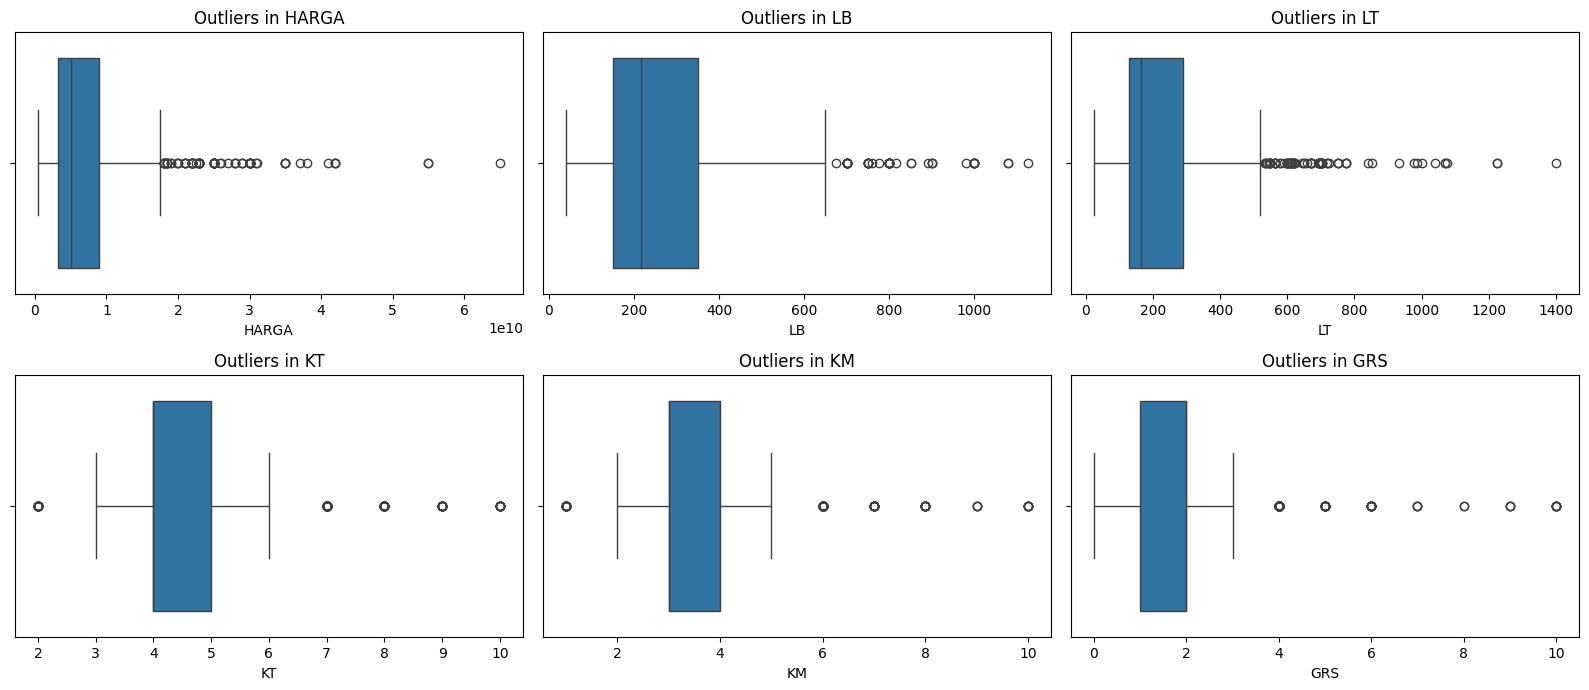

In [10]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

Cek keakuratan data (Jika outlier pada masing-masing kolom memiliki korelasi yang sangat tinggi pada tingi-rendahnya harga, hapus karena sangat mempengaruhi hasil prediksi model).

Melihat banyaknya outlier pada masing-masing kolom.

In [12]:
for i in df_numeric.columns:
    Q1 = df_numeric[i].quantile(0.25)
    Q3 = df_numeric[i].quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    outliers_before = ((df_numeric[i] > maximum) | (df_numeric[i] < minimum)).sum()
    print(f"Outlier pada kolom {i}: {outliers_before}")

Outlier pada kolom HARGA: 94
Outlier pada kolom LB: 53
Outlier pada kolom LT: 88
Outlier pada kolom KT: 153
Outlier pada kolom KM: 117
Outlier pada kolom GRS: 129


Visualisasikan korelasi masing-masing kolom.

Text(0.5, 1.0, 'Correlation Matrix Pada Fitur Numeric')

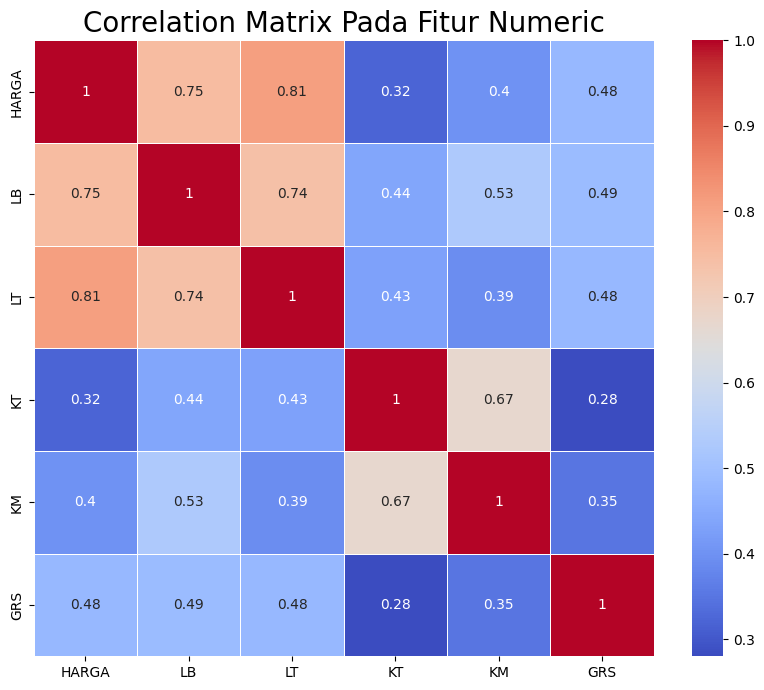

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix Pada Fitur Numeric", size=20)

### Kesimpulan

Fitur LB dan LT memiliki korelasi positif yang paling kuat dengan HARGA, menjadikannya faktor utama penentu harga properti. KT dan KM menunjukkan korelasi positif lemah, sedangkan GRS hampir tidak berpengaruh. Luas bangunan dan tanah adalah indikator utama harga, konsisten dengan logika pasar properti. Maka, saya memutuskan untuk menghapus outlier pada kolom LB dan LT karena jika dibiarkan sangat berpengaruh pada hasil prediksi lantaran memiliki korelasi yang sangat tinggi.

### Pembersihan Outlier

Menghapus ourlier pada kolom LB dan LT (datadframe kini memiliki 906 baris dengan 6 kolom)

In [15]:
Q1 = df_numeric[["LB", "LT"]].quantile(0.25)
Q3 = df_numeric[["LB", "LT"]].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((df_numeric[["LB", "LT"]] < (Q1 - 1.5 * IQR)) |
                    (df_numeric[["LB", "LT"]] > (Q3 + 1.5 * IQR))).any(axis=1)

df_filtered = df_numeric[filter_outliers]
df_filtered.shape

(906, 6)

## Multivariate Analisis

Melihat distribusi pada setiap kolom setelah pembersihan outlier.

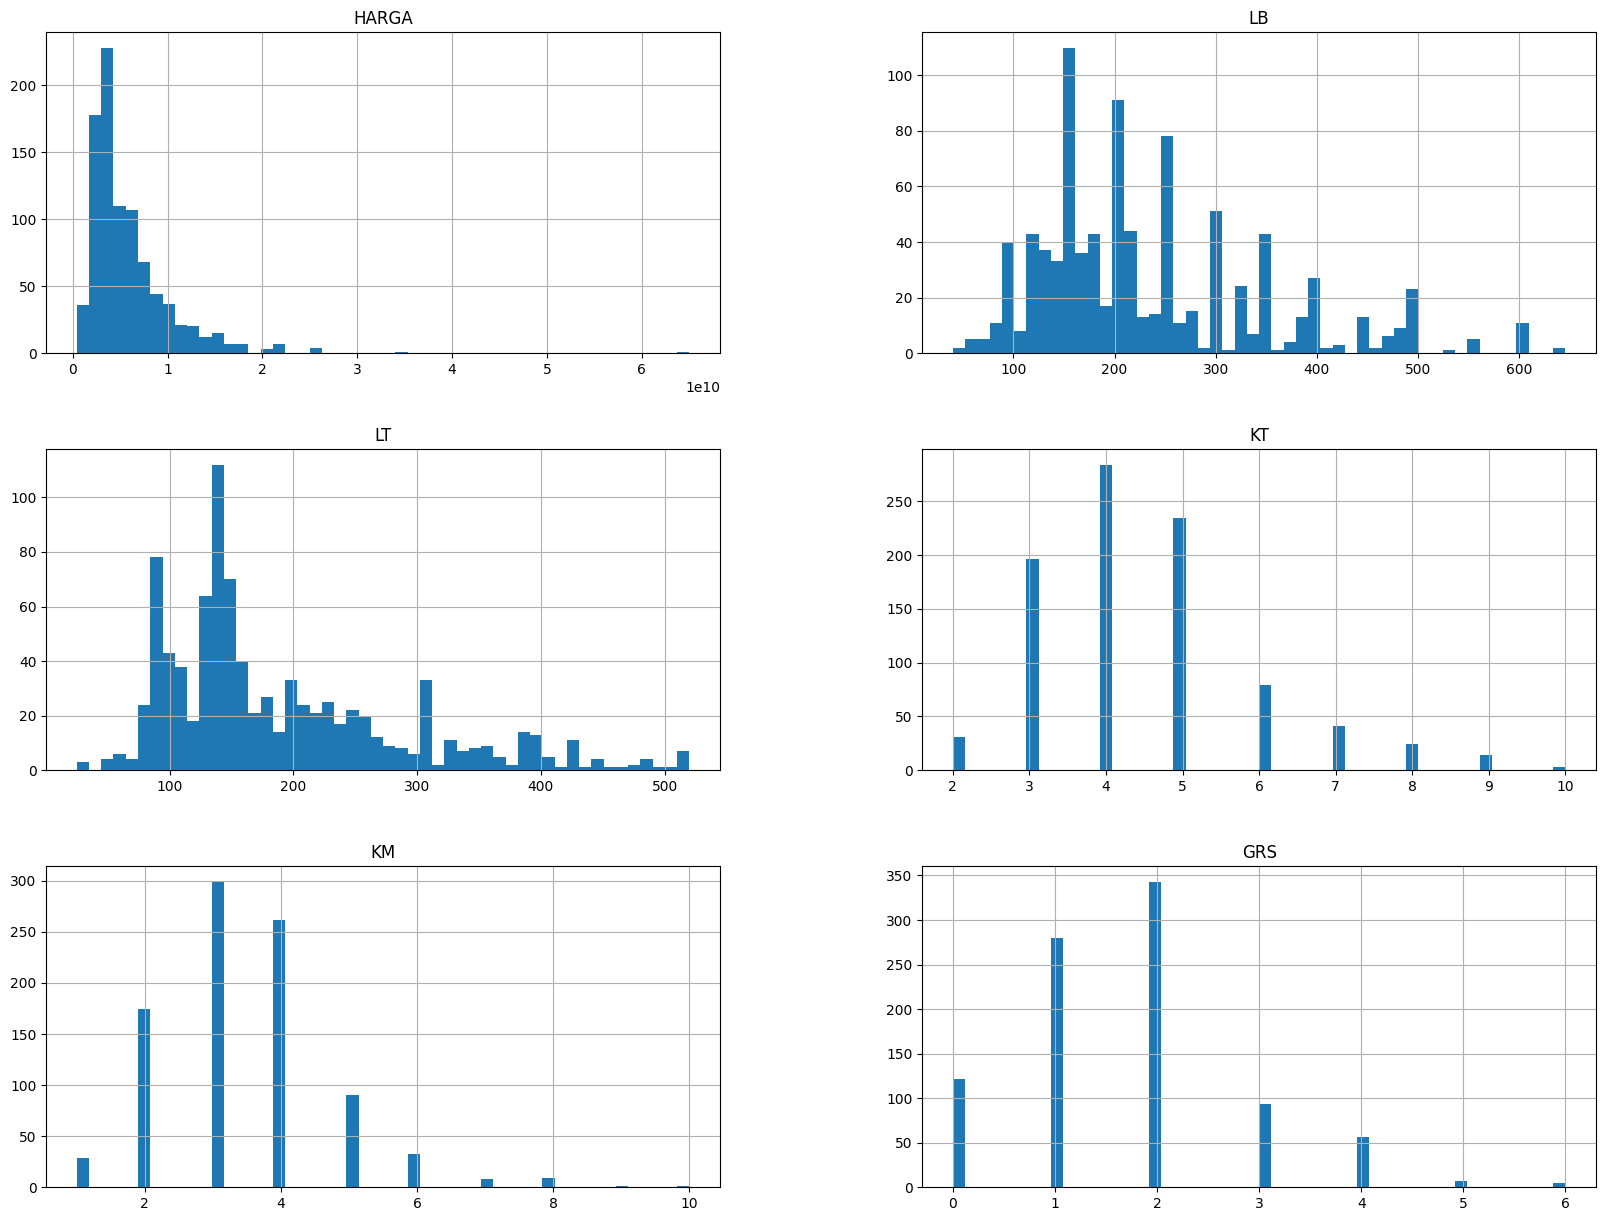

In [17]:
df_filtered.hist(bins=50, figsize=(20,15))
plt.show()

### Informasi yang didapat

- HARGA: Distribusi sangat condong ke kanan (right-skewed) dengan sebagian besar nilai berkumpul di bawah 2 (kemungkinan dalam satuan 1e10, misalnya Rp 1-2 triliun). Ada sedikit outlier di atas 4, menunjukkan harga sangat tinggi yang jarang terjadi.
- LB (Luas Bangunan): Distribusi juga condong ke kanan, dengan puncak di rentang 200-400. Nilai di atas 800 sangat jarang, menunjukkan outlier untuk luas bangunan besar.
- LT (Luas Tanah): Distribusi condong ke kanan dengan puncak di 200-400. Nilai di atas 1000 jarang, menunjukkan outlier untuk luas tanah ekstrem.
- KT (Kamar Tidur): Distribusi cukup merata antara 2-6, dengan puncak di 3-5. Nilai di atas 8 sangat jarang, menunjukkan outlier untuk jumlah kamar tidur tinggi.
- KM (Kamar Mandi): Distribusi condong ke kanan dengan puncak di 2-4. Nilai di atas 8 jarang, menunjukkan outlier untuk jumlah kamar mandi besar.
- GRS (Garasi): Distribusi condong ke kanan dengan puncak di 0-2. Nilai di atas 6 sangat jarang, menunjukkan outlier untuk jumlah garasi besar.

### Kesimpulan

Berdasarkan histogram dan dengan mempertimbangkan bahwa outlier berbanding lurus dengan harga, berikut kesimpulan:

- Korelasi Outlier dengan Harga: Outlier pada HARGA (di atas 4, mungkin Rp 4 triliun+), LB (luas bangunan > 800), LT (luas tanah > 1000), KT (kamar tidur > 8), KM (kamar mandi > 8), dan GRS (garasi > 6) menunjukkan hubungan langsung dengan harga tinggi. Ini mencerminkan properti mewah atau eksklusif.
- Distribusi Data: Sebagian besar properti memiliki nilai standar dengan distribusi condong ke kanan, sementara outlier menunjukkan properti premium. Data terpercaya menegaskan keabsahan harga pasar untuk properti langka.
- Implikasi: Outlier pada fitur seperti luas dan jumlah kamar mendorong harga lebih tinggi, menandakan segmen pasar rumah elit.

Visualisasikan hubungan antar fitur numerik dengan fungsi pairplot()

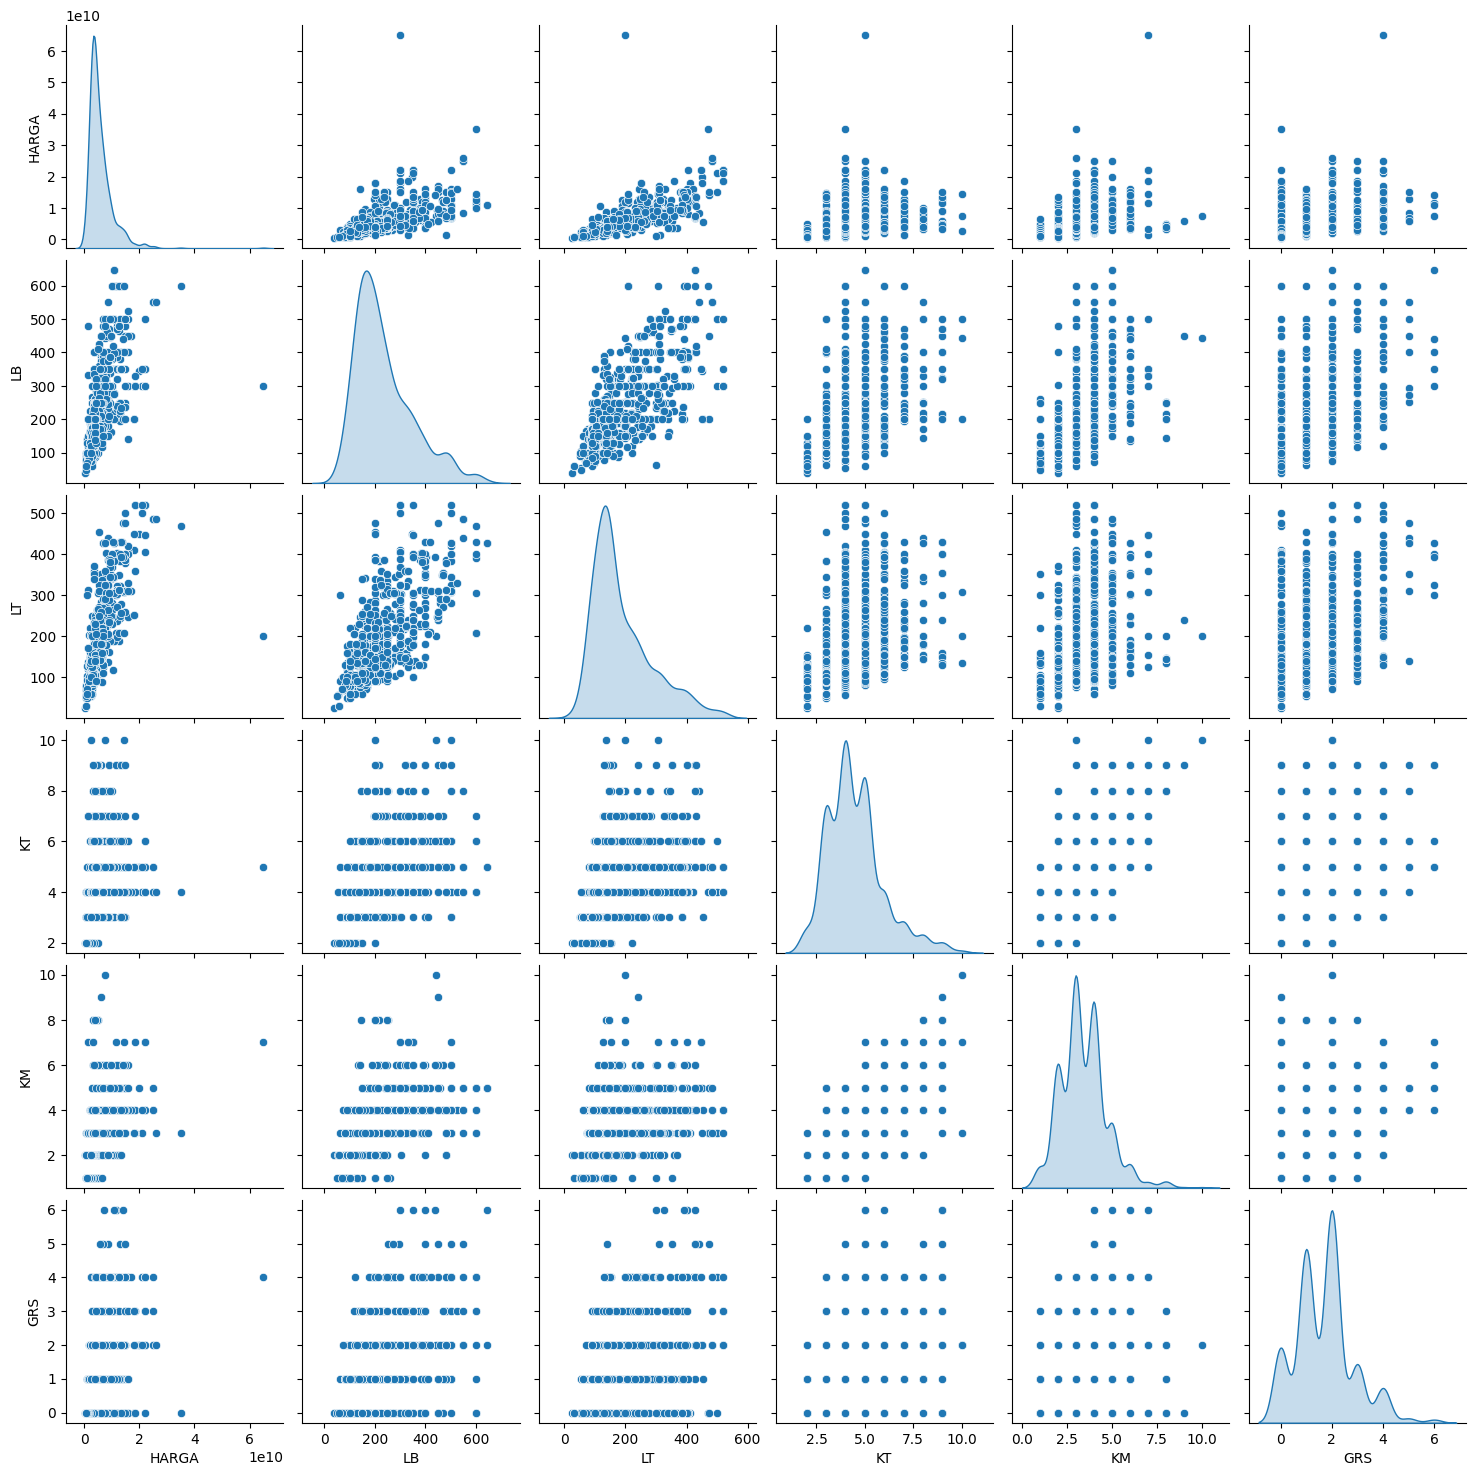

In [18]:
sns.pairplot(df_filtered, diag_kind = 'kde')

### Informasi yang Didapat

Gambar menunjukkan pairplot dari dataset dengan fitur numerik: HARGA, LB, LT, Gambar menunjukkan pairplot dari dataset dengan fitur numerik: HARGA, LB, LT, KT, KM, dan GRS. Pairplot ini menggambarkan hubungan antar fitur melalui scatter plot (di luar diagonal) dan distribusi data melalui histogram/KDE (di diagonal). Fokus analisis pada hubungan dengan fitur target HARGA (kolom/baris keempat dari atas):

- HARGA vs LB (Luas Bangunan): Scatter plot menunjukkan pola naik yang jelas, histogram LB condong ke kiri (skewed). Korelasi positif kuat, luas bangunan lebih besar cenderung meningkatkan harga.
- HARGA vs LT (Luas Tanah): Pola naik terlihat, namun lebih tersebar dibanding LB, dengan distribusi LT juga skewed. Korelasi positif sedang, luas tanah besar berkorelasi dengan harga lebih tinggi.
- HARGA vs KT (Kamar Tidur): Sebaran lebih acak dengan pola naik ringan, distribusi KT menunjukkan puncak di 3-4 kamar. Korelasi positif lemah, jumlah kamar tidur sedikit memengaruhi harga.
- HARGA vs KM (Kamar Mandi): Pola naik ringan, distribusi KM puncak di 2-3 kamar mandi. Korelasi positif lemah, jumlah kamar mandi sedikit berkorelasi dengan harga.
- HARGA vs GRS (Garasi): Sebaran sangat acak, distribusi GRS puncak di 0-1 garasi. Korelasi positif sangat lemah, jumlah garasi hampir tidak memengaruhi harga.

### Kesimpulan

Lagi-lagi fitur LB dan LT memiliki korelasi positif yang kuat dengan HARGA, menunjukkan bahwa luas bangunan dan tanah adalah faktor utama penentu harga.

## Pembersihan dan Pengolahan Data

### Standarisasi

Malakukan standarisasi bertujuan untuk mempermudah model mengolah input. meningkatkan kinerja dan kestabilan model dengan memastikan bahwa setiap fitur atau variabel input berada dalam skala yang seragam

In [20]:
scaler = StandardScaler()

df_scaled_array = df_filtered.drop("HARGA", axis=1)
scaled_array = scaler.fit_transform(df_scaled_array)

df_scaled = pd.DataFrame(scaled_array, columns=df_scaled_array.columns)
df_scaled.head()

,LB,LT,KT,KM,GRS
0,-0.132009,0.306015,-1.035877,-0.345590,-1.511355
1,-0.480469,-0.534227,-0.339140,-0.345590,0.270412
2,0.277431,0.609716,-0.339140,0.439133,2.052178
3,-1.700077,-1.668046,-1.732613,-1.130313,-1.511355
4,1.436059,1.672672,1.054333,1.223856,1.161295


### Membagi Data Training dan Test

Menyiapkan data latih dan data test (dipakai untuk mengevaluasi model). Target (y) dibagi dengan 100000000000 memiliki tujuan yang sama dengan standarisasi yaitu meningkatkan kinerja dan kestabilan model.

In [21]:
X = df_scaled
y = df_filtered["HARGA"]/10000000000 # perkecil dibagi 1000000000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Melihat data latih (data latih memiliki baris sebanyak 815 dengan tipe data float sayng seragam)

In [22]:
X_train, y_train

(           LB        LT        KT        KM       GRS
 103  0.739140 -0.402623  0.357597  1.223856 -0.620472
 751 -0.480469 -0.554473  0.357597  0.439133  1.161295
 54   0.564910  2.229459  0.357597 -0.345590 -1.511355
 469 -0.306239  0.670457  0.357597 -0.345590  0.270412
 534  2.307209  2.128225  1.054333 -0.345590  2.052178
 ..        ...       ...       ...       ...       ...
 98  -1.177388 -1.010026 -1.035877 -1.130313 -1.511355
 322 -1.003158  0.306015  0.357597 -0.345590 -0.620472
 382 -0.489180 -0.483610  0.357597  0.439133  0.270412
 365 -1.177388 -0.797435 -1.732613 -1.130313 -0.620472
 510  2.307209  2.411680  1.054333  0.439133  2.943061
 
 [815 rows x 5 columns],
 112    0.50
 833    0.30
 61     1.80
 519    0.72
 591    1.10
        ... 
 107    0.13
 354    0.22
 418    0.39
 398    0.20
 563    0.68
 Name: HARGA, Length: 815, dtype: float64)

Melihat total dataset (906), data latih (815), dan data test (91)

In [23]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 906
Total # of sample in train dataset: 815
Total # of sample in test dataset: 91


## Pembuatan Model

### Pembuatan Model dengan KNN

Model KNN (K-Nearest Neighbors) Regressor memprediksi nilai output suatu data dengan mencari k tetangga terdekat dari data tersebut dalam data pelatihan, berdasarkan jarak (umumnya Euclidean). Setelah menemukan k tetangga terdekat, model menghitung rata-rata dari nilai target tetangga tersebut, dan menjadikannya sebagai hasil prediksi. KNN tidak membentuk fungsi pembelajaran seperti model lainnya; ia hanya menyimpan data pelatihan dan melakukan pencarian tetangga saat proses prediksi berlangsung.

In [24]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['KNN', 'RandomForest', 'Boosting'])
models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

Baris pertama dari kode membuat sebuah model KNN Regressor dengan jumlah tetangga yang digunakan sebanyak 7, lalu model tersebut dilatih menggunakan data latih X_train dan y_train menggunakan fungsi fit. Selanjutnya, dibuat sebuah DataFrame bernama models yang berfungsi untuk menyimpan nilai mean squared error (MSE) dari berbagai model (KNN, RandomForest, dan Boosting), dengan dua baris. Satu untuk data latih (train_mse) dan satu untuk data uji (test_mse). Pada baris terakhir, dilakukan perhitungan nilai MSE untuk model KNN terhadap data latih, yaitu dengan memprediksi hasil dari X_train menggunakan knn.predict(X_train) dan membandingkannya dengan nilai asli y_train.

### Pembuatan Model dengan RF

Random Forest Regressor (RF) adalah algoritma ensemble berbasis pohon keputusan yang bekerja dengan cara membangun banyak pohon keputusan (decision trees) selama proses pelatihan, lalu hasil prediksinya digabung dengan cara merata-ratakan (untuk regresi). Setiap pohon dilatih pada subset acak dari data latih dan memilih fitur secara acak saat membelah node, sehingga menghasilkan pohon-pohon yang beragam. Teknik ini membuat Random Forest tahan terhadap overfitting dan meningkatkan akurasi serta stabilitas model.

In [28]:
RF = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=55,
    n_jobs=-1
)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Kode dimulai dengan membuat sebuah model RandomForestRegressor dengan parameter tertentu. Jumlah pohon sebanyak 150 (n_estimators=150), kedalaman maksimum pohon 12 (max_depth=12), minimal jumlah sampel untuk membagi node adalah 5 (min_samples_split=5), dan minimal jumlah sampel di setiap daun adalah 3 (min_samples_leaf=3). Nilai random_state=55 digunakan untuk menjaga hasil yang konsisten, dan n_jobs=-1 memungkinkan penggunaan seluruh inti prosesor untuk mempercepat pelatihan. Model tersebut kemudian dilatih dengan data latih X_train dan y_train menggunakan fit(). Setelah itu, dilakukan prediksi terhadap data latih menggunakan RF.predict(X_train), dan hasil prediksi dibandingkan dengan nilai sebenarnya (y_train) untuk menghitung mean squared error (MSE).

### Pembuatan Model dengan Algoritma Boosting

Boosting adalah teknik ensemble yang bekerja dengan cara membangun model secara bertahap, di mana setiap model baru fokus untuk memperbaiki kesalahan dari model sebelumnya. Dalam konteks regresi, seperti AdaBoostRegressor, model pertama memprediksi target, lalu model berikutnya dilatih untuk memprediksi sisa kesalahan (residual) dari prediksi sebelumnya. Proses ini diulang beberapa kali, dan hasil akhirnya adalah gabungan prediksi semua model yang telah dilatih, dengan bobot tertentu. Boosting sangat efektif dalam meningkatkan akurasi, meskipun bisa sensitif terhadap noise dan overfitting jika tidak dikontrol dengan baik.

In [26]:
boosting = AdaBoostRegressor(learning_rate=0.005, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Kode tersebut dimulai dengan membuat objek model AdaBoostRegressor yang merupakan salah satu jenis algoritma boosting, dengan parameter learning_rate=0.005 yang mengatur seberapa besar kontribusi tiap model lemah terhadap hasil akhir, serta random_state=55 untuk memastikan hasil yang konsisten saat model dijalankan ulang. Model tersebut kemudian dilatih menggunakan data latih X_train dan y_train melalui fungsi fit(). Setelah pelatihan selesai, model digunakan untuk melakukan prediksi terhadap data latih dengan boosting.predict(X_train), dan hasil prediksi tersebut dibandingkan dengan nilai target sebenarnya (y_train) untuk menghitung mean squared error (MSE).

## Evaluasi Model

Melihat hasil error (mse) dari data train dan data test

In [29]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

mse

,train,test
KNN,0.067849,0.052557
RF,0.044523,0.046944
Boosting,0.075093,0.076101


### Visualisasi

Visualisasikan hasil evaluasi model tersebut

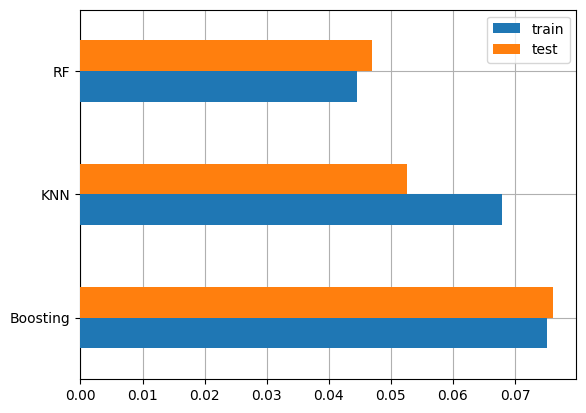

In [31]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Tuning Model Terbaik (Random Forest)

Mengambil dan melakukan tuning pada model RF sebagai model terbaik berdasarkan hasil evaluasi.

In [32]:
param_dist = {
    'n_estimators': [100, 150, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None],  # hapus 'auto'
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=55,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=12,
                                                   min_samples_leaf=3,
                                                   min_samples_split=5,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=55),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300,
                                                         500]},
                   random_state=55, scoring='neg_mean_squared_error',
                   verbose=2)

Kode tersebut melakukan pencarian hyperparameter terbaik untuk model RandomForestRegressor menggunakan RandomizedSearchCV. Pertama, disiapkan dictionary param_dist berisi kombinasi nilai hyperparameter yang akan diuji. Lalu, RandomizedSearchCV dibuat untuk mencoba 50 kombinasi parameter secara acak (n_iter=50) dengan 5-fold cross-validation (cv=5) dan evaluasi berdasarkan nilai negatif dari mean squared error. Pengaturan n_jobs=-1 mempercepat proses dengan memanfaatkan semua core CPU, dan verbose=2 menampilkan progres di konsol. Akhirnya, model dilatih pada X_train dan y_train dengan fit().

mengevaluasi best model. melihat mse dari data train dan test

In [33]:
best_rf = random_search.best_estimator_

train_preds = best_rf.predict(X_train)
test_preds = best_rf.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, train_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))

Train MSE: 0.012145257343946378
Test MSE: 0.05310734145464369


## Prediksi Harga

Fungsi yang malakukan preprosesing pada input dengan menggunakan scaler yang sebelumnya dibuat, kemudian melakukan prediksi dengan data melalui fungsi predict().

In [34]:
def predict_price(lb, lt, kt, km, grs):
    # Format input dan lakukan scaling
    input_data = pd.DataFrame({
      'LB': [lb],
      'LT': [lt],
      'KT': [kt],
      'KM': [km],
      'GRS': [grs]
    }, index=[0])
    input_scaled = scaler.transform(input_data)

    # Prediksi menggunakan model yang sudah dilatih
    predicted_price = best_rf.predict(input_scaled)[0]

    return predicted_price


Fungsi untuk mempersilahkan user memasukan data dan mendapatkan prediksi dari data.

In [35]:
def user_input_and_predict():
    try:
        print("Masukkan data properti untuk prediksi harga:")
        lb = float(input("Luas Bangunan (m²): "))
        lt = float(input("Luas Tanah (m²): "))
        kt = int(input("Jumlah Kamar Tidur: "))
        km = int(input("Jumlah Kamar Mandi: "))
        grs = int(input("Jumlah Garasi: "))

        hasil = predict_price(lb, lt, kt, km, grs)
        print(f"\n➡️ Perkiraan harga properti: Rp {int(hasil*10000000000):,}".replace(",", "."))
    except Exception as e:
        print("Terjadi kesalahan saat input atau prediksi:", e)

Memanggil fungsi user_input_and_predict

In [37]:
user_input_and_predict()

Masukkan data properti untuk prediksi harga:
Luas Bangunan (m²): 220
Luas Tanah (m²): 220
Jumlah Kamar Tidur: 3
Jumlah Kamar Mandi: 3
Jumlah Garasi: 0

➡️ Perkiraan harga properti: Rp 4.118.999.999


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Tujuan Tercapai

- Mengetahui fitur-fitur paling berpengaruh pada kenaikan harga rumah (Luas Tanah, Luas Bangunan)
- Membangun Model yang bisa memberikan estimasi harga rumah dengan baik

## Simpan Model dan Scaler

Mengimpor pustaka joblib sebagai pustaka yang membuat kita dapat mengekpor model yang teah dilatih

In [38]:
import joblib

joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Dependencies

Menuliskan seluruh pustaka atau module yang di pakai

In [39]:
!pip freeze > requirements.txt